<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common NLP Tasks with Machine Learning

Natural Language Processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret, and manipulate human language. This notebook demonstrates various common NLP tasks using machine learning techniques.

We'll use practical examples to show how different NLP tasks can be implemented and what insights they can provide.

## Summary

This notebook covers the following NLP tasks:
1. Basic Text Analysis
   - Word frequency
   - Word clouds
   - N-grams analysis
2. Sentiment Analysis
   - Using pre-trained models
   - Training custom classifiers
3. Keyword Extraction
   - TF-IDF based extraction
   - YAKE/RAKE algorithms
4. Topic Modeling
   - LDA (Latent Dirichlet Allocation)
5. Named Entity Recognition (NER)
   - Using spaCy
6. Text Similarity Analysis
   - Cosine similarity
   - Word embeddings

Each section includes explanations, code implementation, and visualizations.

### Dataset Overview

The **IMDB Movie Reviews Dataset** is a widely-used open-source dataset for sentiment analysis tasks. It contains:
- **50,000 Movie Reviews**: Split into 25,000 training and 25,000 testing samples.
- **Binary Sentiment Labels**: Each review is labeled as either positive or negative.

The dataset is available for download [here](https://ai.stanford.edu/~amaas/data/sentiment/).

## Dataset

We're using a movie reviews dataset that contains:
- Movie reviews text
- Sentiment labels (positive/negative)

The data has been preprocessed (cleaned) and is available in our repository:
- Original source: [Link to original dataset]
- Preprocessed data: [Link to your GitHub repository]

Preprocessing steps already applied:
- Converted to lowercase
- Removed special characters and punctuation
- Removed stop words
- Tokenization

Let's load our preprocessed data and start the analysis.

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URLs for the datasets
train_url = "https://raw.githubusercontent.com/calmrocks/master-machine-learning-engineer/main/BasicModels/data/processed_train_data.csv"
test_url = "https://raw.githubusercontent.com/calmrocks/master-machine-learning-engineer/main/BasicModels/data/processed_test_data.csv"

# Load both datasets
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Display basic information
print("Training Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

print("\nColumns in training data:", train_df.columns.tolist())

print("\nSample of training data:")
display(train_df.head())

print("\nSample of test data:")
display(test_df.head())

# Basic statistics
print("\nClass distribution in training data:")
print(train_df['sentiment'].value_counts(normalize=True))

Training Dataset Shape: (25000, 3)
Test Dataset Shape: (25000, 3)

Columns in training data: ['review', 'sentiment', 'cleaned_review']

Sample of training data:


,review,sentiment,cleaned_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,negative,rented curiousyellow video store controversy s...
1,"""I Am Curious: Yellow"" is a risible and preten...",negative,curious yellow risible pretentious steaming pi...
2,If only to avoid making this type of film in t...,negative,avoid making type film future film interesting...
3,This film was probably inspired by Godard's Ma...,negative,film probably inspired godards masculin fminin...
4,"Oh, brother...after hearing about this ridicul...",negative,oh brotherafter hearing ridiculous film umptee...



Sample of test data:


,review,sentiment,cleaned_review
0,I love sci-fi and am willing to put up with a ...,negative,love scifi willing put lot scifi moviestv usua...
1,"Worth the entertainment value of a rental, esp...",negative,worth entertainment value rental especially li...
2,its a totally average film with a few semi-alr...,negative,totally average film semialright action sequen...
3,STAR RATING: ***** Saturday Night **** Friday ...,negative,star rating saturday night friday night friday...
4,"First off let me say, If you haven't enjoyed a...",negative,first let say havent enjoyed van damme movie s...



Class distribution in training data:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64


Our datasets are now loaded and ready for analysis. We have:
- Training data for model development and training
- Test data for final evaluation of our models

In the following sections, we'll use these datasets to demonstrate various NLP tasks, primarily using the training data for analysis and model development, while keeping the test data for final evaluation.

## Data Preprocessing

Before diving into NLP tasks, let's understand how we preprocessed our raw text data. The cleaned reviews are stored in the 'cleaned_review' column.

### Preprocessing Steps:
1. **Text Cleaning**
   - Converting all text to lowercase
   - Removing punctuation and special characters using regex
   - Keeping only alphabetic characters and spaces

2. **Tokenization**
   - Breaking text into individual words/tokens using NLTK's word_tokenize

3. **Stop Words Removal**
   - Removing common English stop words (e.g., 'the', 'is', 'at', 'which')
   - Using NLTK's English stop words list

Here's the preprocessing code we used:

```
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Example of our preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Let's show an example
original_text = train_df['review'].iloc[0]
cleaned_text = train_df['cleaned_review'].iloc[0]

print("Original text:")
print(original_text[:500], "...\n")
print("Cleaned text:")
print(cleaned_text[:500], "...")
```

### Impact of Preprocessing
- Reduced noise in the text data
- Removed irrelevant words and characters
- Standardized text format
- Made text more suitable for machine learning algorithms

The cleaned data will be used for all our subsequent NLP tasks. Each task might require additional specific preprocessing, which we'll discuss in their respective sections.

# NLP Tasks

## 1. Basic Text Analysis

In this section, we'll perform fundamental text analysis to understand our data better:
- Word frequency analysis
- Word cloud visualization
- N-grams analysis
- Basic text statistics

In [2]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to get word frequency
def get_word_freq(text_series):
    words = ' '.join(text_series).split()
    return Counter(words)

# Get word frequencies
word_freq = get_word_freq(train_df['cleaned_review'])

# Display top 20 most common words
print("Most common words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Most common words:
br: 57686
movie: 41812
film: 37460
one: 25509
like: 19642
good: 14556
even: 12506
would: 12135
time: 11790
really: 11664
story: 11457
see: 11223
much: 9584
well: 9377
get: 9212
also: 9075
people: 8951
bad: 8920
great: 8895
first: 8857


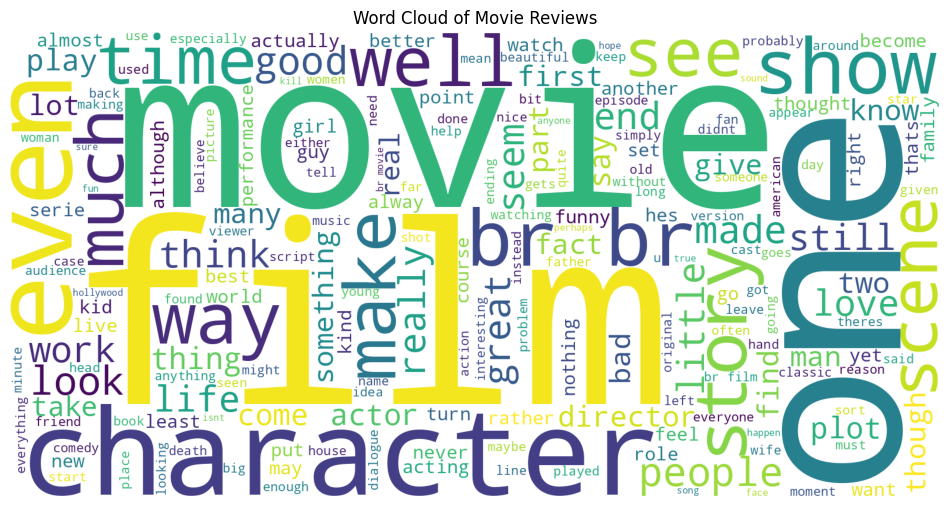

In [3]:
# Create word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(train_df['cleaned_review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

In [5]:
# N-grams analysis
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def get_top_ngrams(text_series, n, k=10):
    # Use sparse matrix instead of dense array
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=10000)  # Limit features
    ngrams = vectorizer.fit_transform(text_series)

    # Sum without converting to dense array
    count_values = np.asarray(ngrams.sum(axis=0)).ravel()

    # Get top k indices
    top_indices = count_values.argsort()[-k:][::-1]

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Return top ngrams and their counts
    return [(feature_names[i], count_values[i]) for i in top_indices]

# Take a sample of the data if needed
sample_size = 5000  # Adjust this number based on your memory constraints
sample_reviews = train_df['cleaned_review'].sample(n=sample_size, random_state=42)

print("Top 10 Bigrams (based on sample):")
for ngram, count in get_top_ngrams(sample_reviews, 2):
    print(f"{ngram}: {count}")

print("\nTop 10 Trigrams (based on sample):")
for ngram, count in get_top_ngrams(sample_reviews, 3):
    print(f"{ngram}: {count}")

Top 10 Bigrams (based on sample):
br br: 1400
br film: 268
br movie: 236
ever seen: 222
special effects: 220
ive seen: 214
dont know: 213
even though: 197
itbr br: 189
looks like: 178

Top 10 Trigrams (based on sample):
ive ever seen: 83
worst movie ever: 39
new york city: 34
movie ever seen: 33
one worst movies: 30
dont get wrong: 29
dont waste time: 29
br br movie: 29
br br film: 28
movie ive seen: 26


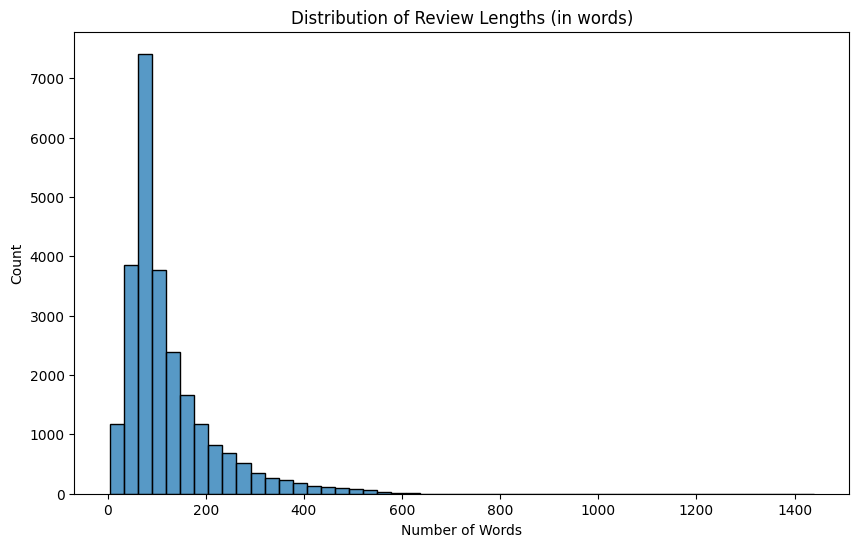


Text Statistics:
Average words per review: 122.93
Median words per review: 91.00
Max words in a review: 1440
Min words in a review: 4


In [6]:
# Basic text statistics
train_df['word_count'] = train_df['cleaned_review'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='word_count', bins=50)
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

print("\nText Statistics:")
print(f"Average words per review: {train_df['word_count'].mean():.2f}")
print(f"Median words per review: {train_df['word_count'].median():.2f}")
print(f"Max words in a review: {train_df['word_count'].max()}")
print(f"Min words in a review: {train_df['word_count'].min()}")

## Sentiment Analysis

Sentiment analysis is the process of determining the emotional tone behind text. For our movie reviews dataset, we'll explore different approaches to analyze sentiment:

### Approach 1: Rule-based Sentiment Analysis
First, let's use TextBlob, a simple rule-based approach that assigns polarity scores to text.

In [ ]:
from textblob import TextBlob

# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to a sample of reviews
sample_reviews = train_df['cleaned_review'].head(5)
for review in sample_reviews:
    sentiment = get_textblob_sentiment(review)
    print(f"Sentiment Score: {sentiment:.2f}")
    print(f"Text: {review[:100]}...\n")

Training feature matrix shape: (25000, 5000)
Testing feature matrix shape: (25000, 5000)


### Approach 2: Machine Learning Based Classification
Now, let's build a simple machine learning classifier using TF-IDF features and logistic regression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['cleaned_review'])
X_test = tfidf.transform(test_df['cleaned_review'])

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, train_df['sentiment'])

# Make predictions
y_pred = lr_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(test_df['sentiment'], y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(test_df['sentiment'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy: 0.88036
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



### Approach 3: Using Transformers
Finally, let's use a pre-trained BERT model specifically fine-tuned for sentiment analysis.

In [ ]:
from transformers import pipeline

# Initialize sentiment analyzer
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze a few samples
sample_reviews = train_df['cleaned_review'].head(3)
for review in sample_reviews:
    # Truncate review if too long (BERT has token limits)
    truncated_review = ' '.join(review.split()[:100])
    result = sentiment_analyzer(truncated_review)
    print(f"Label: {result[0]['label']}")
    print(f"Score: {result[0]['score']:.4f}")
    print(f"Text: {truncated_review[:100]}...\n")

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### Comparing Different Approaches

Each approach has its strengths and limitations:
- **Rule-based (TextBlob)**:
  - Fast and simple
  - No training required
  - Less accurate for domain-specific text

- **Machine Learning (Logistic Regression)**:
  - Good performance with simple implementation
  - Can learn domain-specific patterns
  - Requires training data

- **Transformers (BERT)**:
  - Most sophisticated and generally most accurate
  - Can understand context better
  - Computationally intensive
  - Token length limitations

The choice of approach depends on your specific needs, considering factors like accuracy requirements, computational resources, and available training data.

## Step 5: Deployment and Applications

### Deployment Options:
- **Logistic Regression**: Suitable for deployment in resource-constrained environments, such as mobile apps.
- **BERT**: Ideal for high-stakes applications requiring state-of-the-art accuracy.